# Introduction



In [1]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.0.0-beta1
2.2.4-tf


## Sample Nueral Network

Building a nueral network to classify clothing.

In [2]:
# load the data
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
print('X_train_full', X_train_full.shape)
print('X_test', X_test.shape)

X_train_full (60000, 28, 28)
X_test (10000, 28, 28)


In [3]:
# create validation set from the training set and normalize to 0-1 pixel intensities
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [4]:
# map classifications of clothing to literal strings (0: T-shirt/top, 1:Trouser, etc...)
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

**Sample of the data**

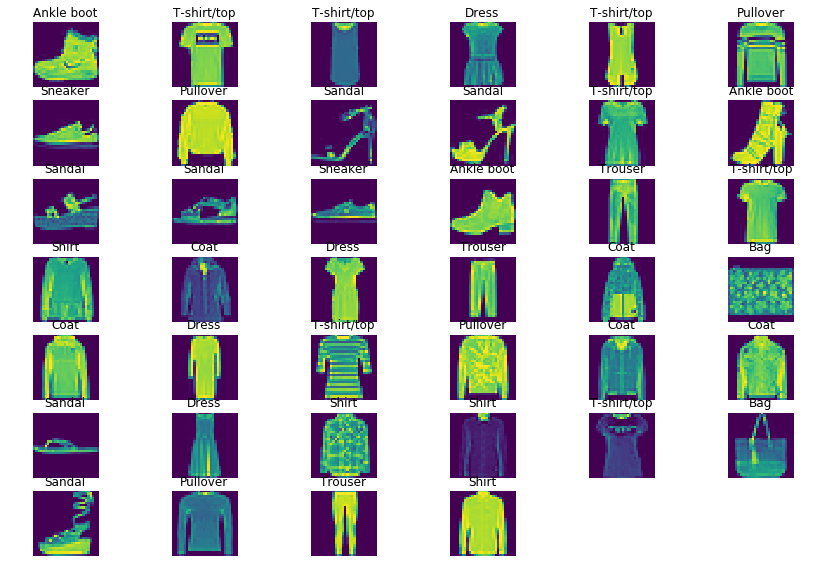

In [31]:
import matplotlib.pyplot as plt
from mltoolbox.draw.misc import image_matrix


n_images = 10*4
english_labels = [class_names[y_valid[i]] for i in range(n_images)]
image_matrix(X_valid[:n_images],titles=english_labels, figsize=(12, 8))

**Building the Network Architecture**


In [33]:
# build the netwrok architecture
model = keras.models.Sequential()
untitled:Untitled-2
# first layer takes an input of 28x28 matrix and flattens (X.reshape(-1, 1)) it to a single array of length 28x28=784.
# so the input becomes a single input pixel
# the model is naturally dynammic, in the sense that if the input isn't known before hand, the model summary or build
# would not be recognized until the model is run, or it is specified before hand.
model.add(keras.layers.Flatten(input_shape=[28, 28]))
# the next layer is 300 nuerons, it is dense because the 784 input nuerons each feed into the 300 neurons in the dense layer
# each dense layer manages its own weight matrix (which is connections between itself and the previous layer).
# additionally, it also manages a bias vector (on bias term per 300 nuerons)
# use relu activation function; relu(XW + b)
model.add(keras.layers.Dense(300, activation="relu"))
# adding another hidden; repeating the same pattern as before, but using fewer neurons
model.add(keras.layers.Dense(100, activation="relu"))
# add the final output layer, with 10 nuerons (1 neuron per class)
# use the softmax function in order discritize the classes exclusively
model.add(keras.layers.Dense(10, activation="softmax"))

In [50]:
# alternatively, we can construct the model like:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28], name='input'),
    keras.layers.Dense(300, activation="relu", name='hidden_dense_1', kernel_initializer='glorot_uniform'),
    keras.layers.Dense(100, activation="relu", name='hidden_dense_2', bias_initializer='zeros'),
    keras.layers.Dense(10, activation="softmax", name='output')
])

We can view the architecture of the model by looking at its summary profile

In [51]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Flatten)              (None, 784)               0         
_________________________________________________________________
hidden_dense_1 (Dense)       (None, 300)               235500    
_________________________________________________________________
hidden_dense_2 (Dense)       (None, 100)               30100     
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Lets take some time to understand this. In the first column, we have the layer name and type. In the second column, we have the number of nueron in the layer. In the third column, we have the total number of parameters (numbers that could vary) in the layer. The input layer has 0, because the input comes from the image. In the second layer, we have `(784*300)+300=235500` parameters. These are the weights. Each neuron from the input layer connects to each nueron in the next layer for 300 nuerons. This creates `(784*300=235200)` connection weights. The additional 300 weights come from the additional bias nueron for each of the neurons in this layer.

**Indexing the architecture**

In [52]:
# layer attributes
print('model.layers[0].name', model.layers[0].name)

# layer weights
weights, biases = model.layers[1].get_weights()
print('weights[0:5, 0:5]', weights[0:5, 0:5])
print('biases[0:5]', biases[0:5])

model.layers[0].name input
weights[0:5, 0:5] [[-0.02411931 -0.04735401 -0.03674765  0.03505585  0.05253313]
 [ 0.02925196 -0.02927049  0.04573859 -0.06834581  0.04542356]
 [-0.04691781 -0.01202133  0.07133646 -0.05095383  0.01955978]
 [-0.02961118 -0.07295219 -0.02501561 -0.01491988 -0.03292197]
 [ 0.02738893 -0.00016259  0.07034943  0.00599658 -0.00695395]]
biases[0:5] [0. 0. 0. 0. 0.]
